# AIRBNB

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
import seaborn as sns
import datetime


In [2]:
train=pd.read_csv('/Users/Ines/Desktop/Msc DSBA/Machine Learning/Airbnb Project/clean_data/train.csv')
test=pd.read_csv('/Users/Ines/Desktop/Msc DSBA/Machine Learning/Airbnb Project/clean_data/test.csv')
train0=pd.read_csv('/Users/Ines/Desktop/Msc DSBA/Machine Learning/Airbnb Project/train_users_2.csv', na_values=['-unknown-'])
test0=pd.read_csv('/Users/Ines/Desktop/Msc DSBA/Machine Learning/Airbnb Project/test_users.csv',  na_values=['-unknown-'])

train0 = train0.drop(['date_first_booking'], axis = 1)

#sessions=pd.read_csv('/Users/Ines/Desktop/Msc DSBA/Machine Learning/Airbnb Project/sessions.csv')
data = pd.concat([train, test])
data0=pd.concat([train0, test0])

In [3]:
data0.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,NaN,gxn3p5htnn,en,Web,0,facebook,20090319043255
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,US,2010-09-28,NaN,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,20090609231247
3,direct,direct,42.0,other,2011-12-05,NaN,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,20091031060129
4,direct,direct,41.0,US,2010-09-14,NaN,untracked,Chrome,Mac Desktop,NaN,87mebub9p4,en,Web,0,basic,20091208061105


## Some initial cleaning

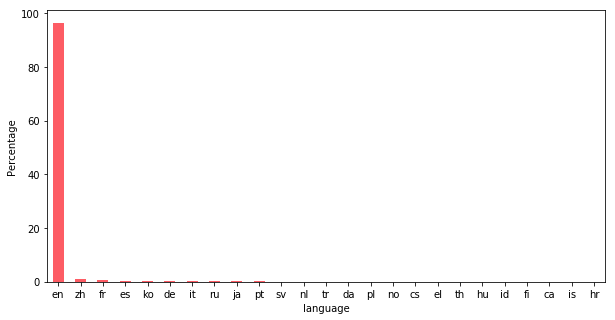

In [4]:

## See the frequency of our target : destinantion
plt.figure(figsize=(10,5))
language = data0['language'].value_counts() / data0.shape[0] * 100
language.plot(kind='bar',color='#FD5C64', rot=0)
plt.xlabel('language')
plt.ylabel('Percentage')
plt.show()
# replacing the missing value in language by english because it's heavily dominant
data0.language.fillna(value = 'en', inplace = True)

In [5]:
# it seems logical to fill the first affiliate tracked non available values with 'untracked'
data0.first_affiliate_tracked.fillna('untracked', inplace = True)

In [6]:
# there are a lot of different values, so we will simply keep the most important and discard the other as 'other', includint na values
most_common_browser = data0.first_browser.value_counts().sort_values( ascending = False)[:9].index
data0.first_browser = data0.first_browser.apply(lambda x: x if x in most_common_browser else 'other')

# Train set exploration

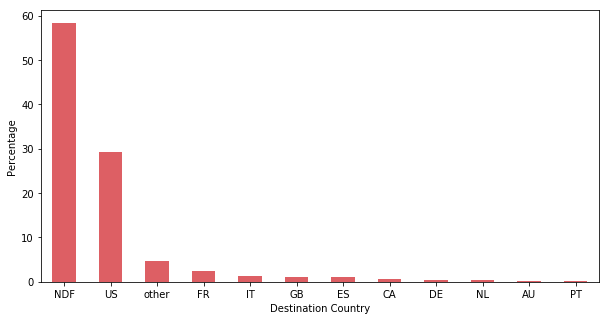

In [7]:
## See the frequency of our target : destinantion
plt.figure(figsize=(10,5))
country_share = train0['country_destination'].value_counts() / train0.shape[0] * 100
country_share.plot(kind='bar',color='#DD5F64', rot=0)
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
plt.show()

###### Most users have never booked an Airbnb. The ones that have, frequently use United States as their first destination.

In [12]:
#Stacked_bar function: 
def stacked_bar(feature):
    ctab = pd.crosstab(train0[feature], train0.country_destination, dropna=False).apply(lambda x: x/x.sum(), axis=1)
    ctab[countries].plot(kind='bar', stacked=True,colormap='Paired', legend=True, figsize=(15, 8))
    plt.show()
countries = ['NDF','US','other','FR','IT','GB','ES','CA','DE','NL','AU','PT']

## Who Goes Where ?

### By language

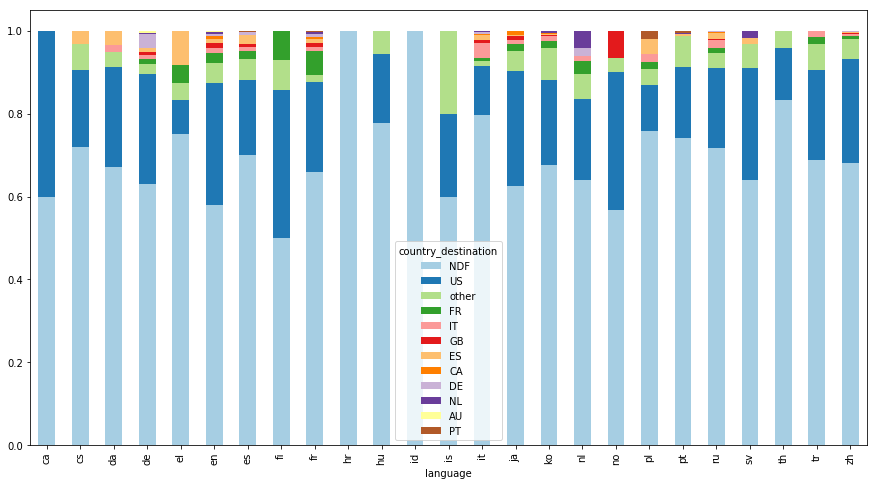

In [13]:
stacked_bar('language')

###### People speaking hungarian and id never book. People speakinf finnish are the ones who book the most. But when we look at the distribution of the languages spoken, we notice that there are not a lot of people speaking other languages than English. 

### By sign-up flow

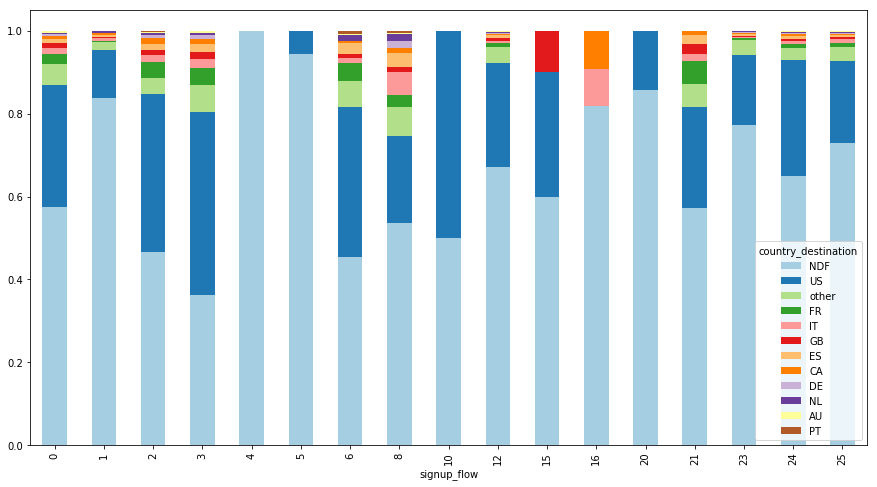

In [20]:
stacked_bar('signup_flow')

###### ->People who sign up from 8, 3 , 16, 21  are most likely to book. Those who sign up from 1, 4, 5, 10, 12, 20, 23 etc are less likely.

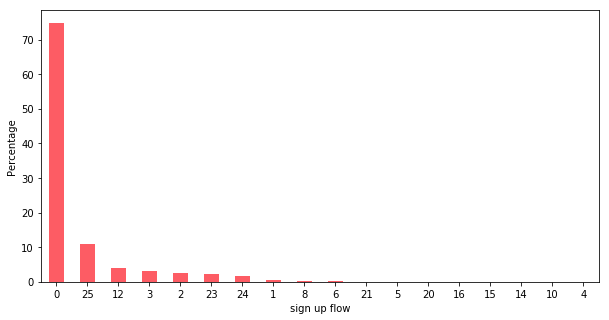

In [21]:
plt.figure(figsize=(10,5))
language = data0['signup_flow'].value_counts() / data0.shape[0] * 100
language.plot(kind='bar',color='#FD5C64', rot=0)
plt.xlabel('sign up flow')
plt.ylabel('Percentage')
plt.show()

### By sign-up App

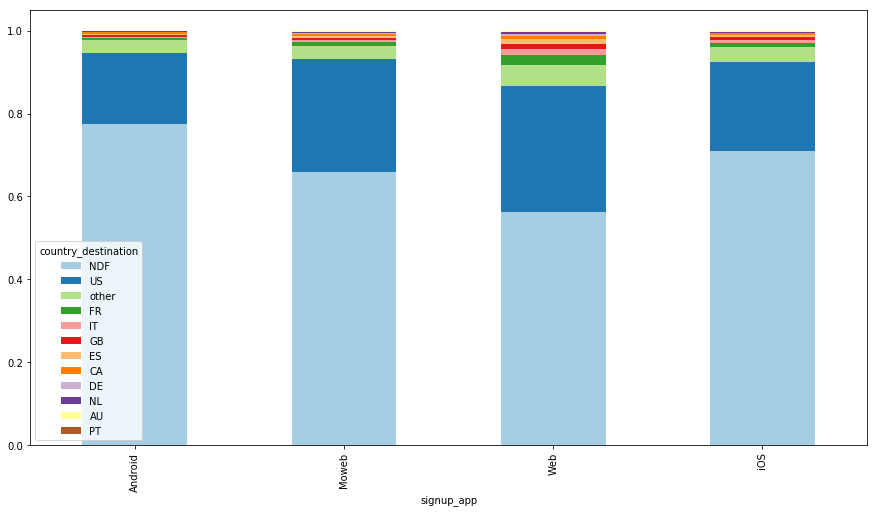

In [22]:
stacked_bar('signup_app')

###### ->People who sign up through phones seem to be less likely to convert. We can get similar result when we plot by irst_device_type. (Computers are most likely to book)

In [24]:
###plot age groups vs destination

### By Date

In [25]:
#date ==>  split the date into day week month and year

#fixing format date
data0['date_account_created'] = pd.to_datetime(data0['date_account_created'], format='%Y-%m-%d')
data0['timestamp_first_active'] = pd.to_datetime(data0['timestamp_first_active'], format='%Y%m%d%H%M%S')
data0['date_account_created'].fillna(data0.timestamp_first_active, inplace=True)
date_account_created = pd.DatetimeIndex(data0['date_account_created'])
date_first_active = pd.DatetimeIndex(data0['timestamp_first_active'])

data0['day_account_created'] = date_account_created.day
data0['weekday_account_created'] = date_account_created.weekday
data0['week_account_created'] = date_account_created.week
data0['month_account_created'] = date_account_created.month
data0['year_account_created'] = date_account_created.year
data0['day_first_active'] = date_first_active.day
data0['weekday_first_active'] = date_first_active.weekday
data0['week_first_active'] = date_first_active.week
data0['month_first_active'] = date_first_active.month
data0['year_first_active'] = date_first_active.year
data0.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,...,day_account_created,weekday_account_created,week_account_created,month_account_created,year_account_created,day_first_active,weekday_first_active,week_first_active,month_first_active,year_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,NaN,...,28,0,26,6,2010,19,3,12,3,2009
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,...,25,2,21,5,2011,23,5,21,5,2009
2,direct,direct,56.0,US,2010-09-28,NaN,untracked,IE,Windows Desktop,FEMALE,...,28,1,39,9,2010,9,1,24,6,2009
3,direct,direct,42.0,other,2011-12-05,NaN,untracked,Firefox,Mac Desktop,FEMALE,...,5,0,49,12,2011,31,5,44,10,2009
4,direct,direct,41.0,US,2010-09-14,NaN,untracked,Chrome,Mac Desktop,NaN,...,14,1,37,9,2010,8,1,50,12,2009


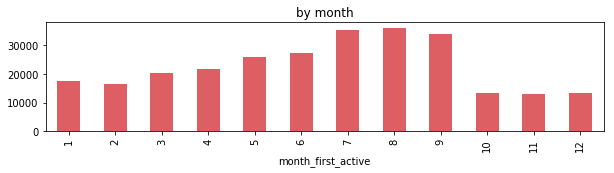

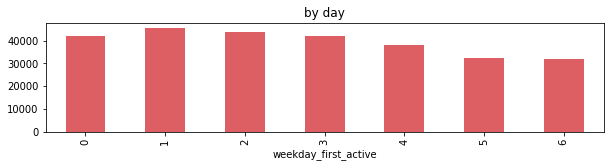

In [26]:
# What is the influence date of booking on the destination
#by month
data0.groupby(['month_first_active'])['timestamp_first_active'].count().plot(kind='bar',figsize=(10,2),title='by month', color='#DD5F64')
plt.show()

#by day of the week
data0.groupby(['weekday_first_active'])['timestamp_first_active'].count().plot(kind='bar',figsize=(10,2),title='by day', color='#DD5F64')
plt.show()

#### -> People are more active during summer and less active during autumn and winter
#### -> People are also more active in the beginning of the week and less active by the end of the week

### By gender

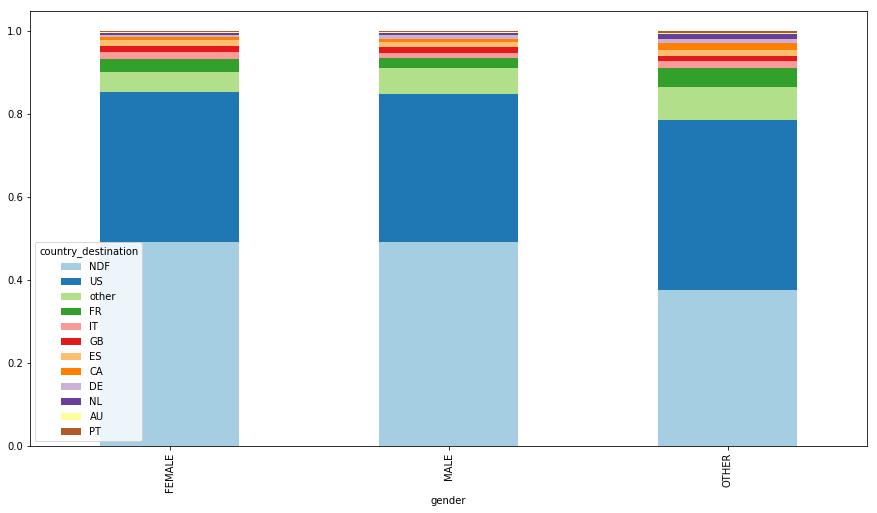

In [27]:
stacked_bar('gender')

###### -> People who don't fill in their sex are more likely to not book, converselty those who filled with others are more likely to book ( but they're not numerous)

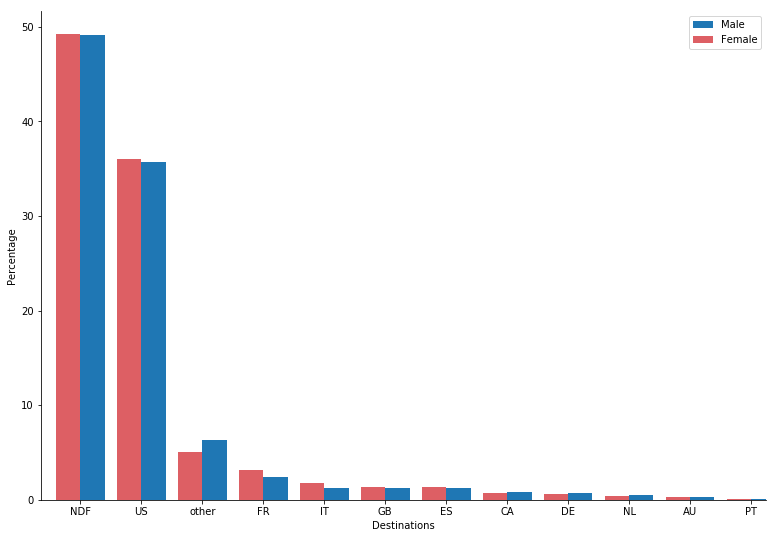

In [28]:

women = sum(train0['gender'] == 'FEMALE')
men = sum(train0['gender'] == 'MALE')

female_destinations = train0.loc[train0['gender'] == 'FEMALE', 'country_destination'].value_counts() / women * 100
male_destinations = train0.loc[train0['gender'] == 'MALE', 'country_destination'].value_counts() / men * 100
width=0.4
male_destinations.plot(kind='bar', width=width,position=0,label='Male', rot=0,figsize=(13,9))
female_destinations.plot(kind='bar', width=width,  position=1, label='Female',color='#DD5F64', rot=0, figsize=(13,9))

plt.legend()
plt.xlabel('Destinations')
plt.ylabel('Percentage')

sns.despine()
plt.show()

##### -> There seems to be no difference between men and women 
##### Hypothesis Testing
H0: There is no relationship between country preference and the sex of the customer.

H1: There is a relationship between country preference and the sex of the customer. significance level alpha = 0.05

In [29]:
# khi square test shows there is a difference
data_gender = train0[(train0['country_destination'] != 'NDF') & (train0['country_destination'] != 'unknown') & (train0['gender'] != 'OTHER') & (train0['gender'].dropna())]
data_gender = data_gender[['id', 'gender', 'country_destination']]




In [30]:
observed = data_gender.pivot_table('id', ['gender'], 'country_destination', aggfunc='count').reset_index()
del observed.columns.name
observed = observed.set_index('gender')
observed

,AU,CA,DE,ES,FR,GB,IT,NL,PT,US,other
gender,,,,,,,,,,,
FEMALE,207,455,358,853,1962,881,1091,254,78,22694,3160
MALE,188,477,416,677,1335,682,699,278,69,19457,3443


In [31]:
from scipy import stats
from sklearn.feature_selection import SelectKBest, chi2
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [32]:
chi2


214.26882956350897

In [33]:
p

1.6903821526166418e-40

#### -> P value is less than 5% so we can reject the null hypothesis. There is a relationship between destination and gender. This information can be  useful for feature engineering.

### By age

#### Age distribution

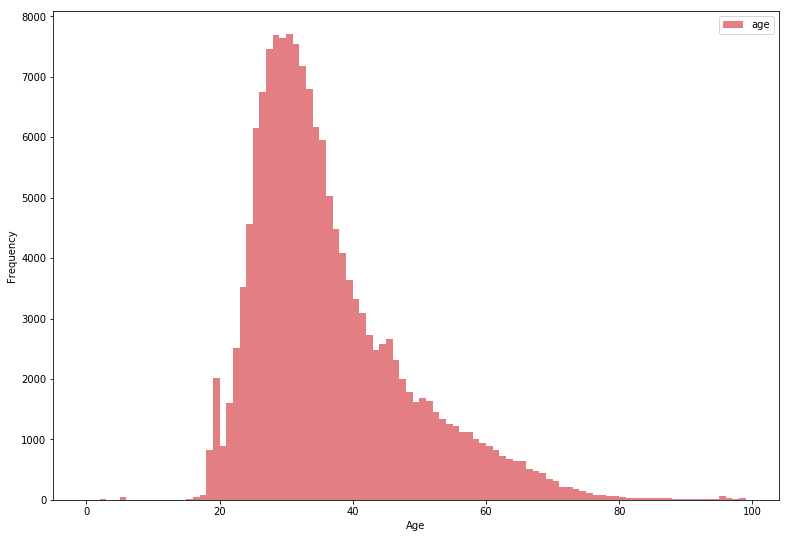

In [34]:
data0.plot(kind='hist', y='age', alpha = 0.8, bins=range(0,100), figsize=(13,9),color='#DD5F64')
plt.xlabel('Age')
plt.show()

##### -> the age is heavily skewed so for filling NaNs we should consider the median rather than the mean

#### Distribution of the age group

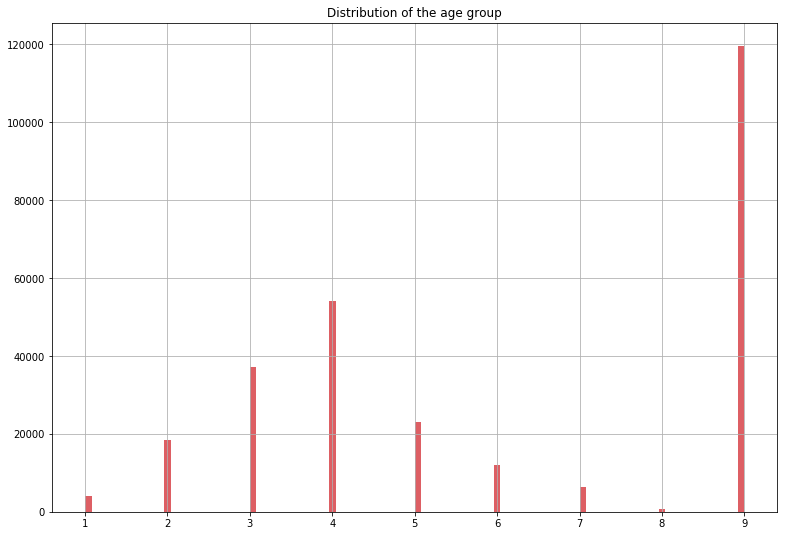

In [35]:
bins = [-1, 20, 25, 30, 40, 50, 60, 75, 100]
data0['age_group']= np.digitize(data0['age'], bins, right=True)
data0.age_group.hist(bins=100, color='#DD5F64', figsize=(13,9))
plt.title('Distribution of the age group')
plt.show()



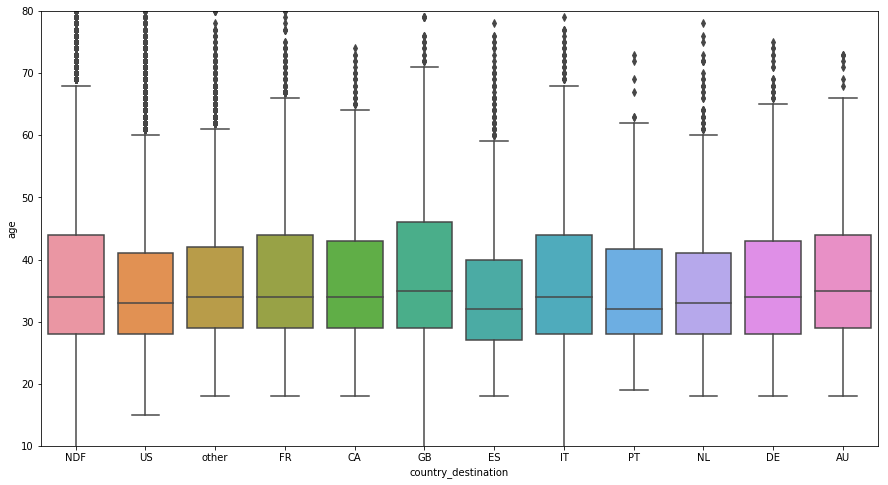

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='country_destination', y='age', data=train0, ax =ax)
ax.set_ylim([10, 80])
plt.show()

###### -> Their distribution is quite similar. GB has the highest median age and Spain has the youngest travelers.

## Heatmap

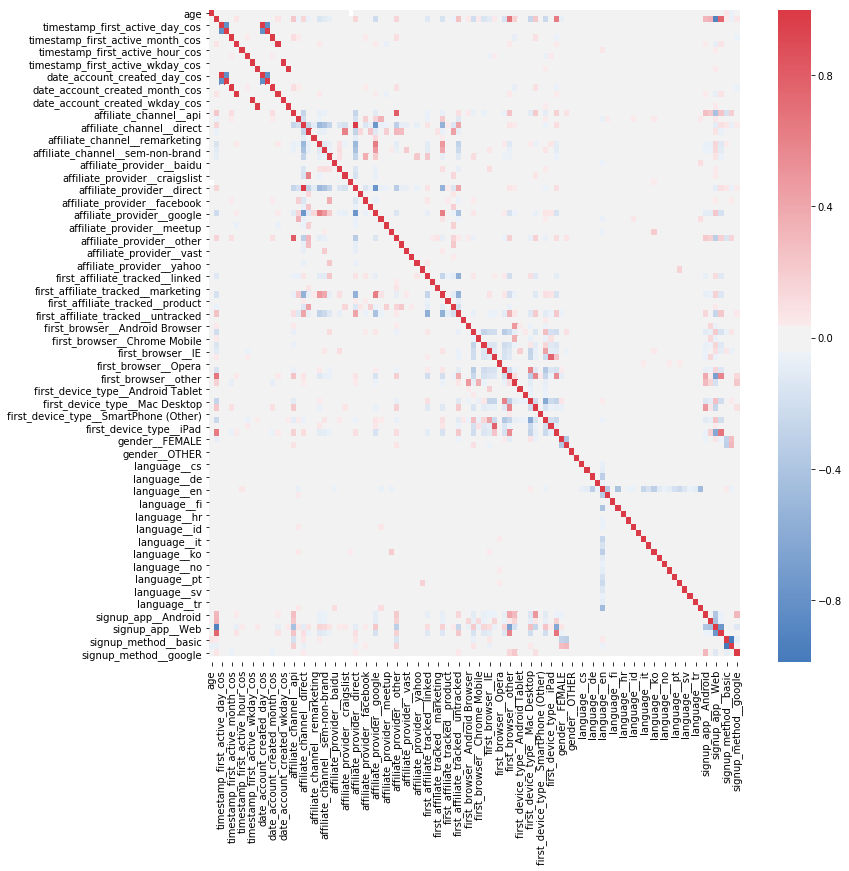

In [37]:
#heatmap
cor_matrix =train.corr().round(2)
# Plotting heatmap 
fig = plt.figure(figsize=(12,12));
sns.heatmap(cor_matrix, annot=False, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()
